Following the text classification tutorial: https://realpython.com/python-keras-text-classification/?__s=36ducjqths8yvwkmpwbm

In [2]:
import pandas as pd
from pathlib import Path

In [3]:
datafolder = Path("data/sentiment labelled sentences")
paths = {'yelp': "yelp_labelled.txt",\
         'amazon': "amazon_cells_labelled.txt",\
         'imdb': "imdb_labelled.txt"}

dfs = []
for source, path in paths.items():
    df = pd.read_csv(datafolder/path, names=['sentence', 'label'], sep='\t', header=None)
    df['source'] = source
    dfs.append(df)

df_all = pd.concat(dfs)
#df_all = df_all.reset_index()
#df_all = df_all.drop(columns='index')

In [4]:
df_all.iloc[999:1010,:]

,sentence,label,source
999,"Then, as if I hadn't wasted enough of my life ...",0,yelp
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon
5,I have to jiggle the plug to get it to line up...,0,amazon
6,If you have several dozen or several hundred c...,0,amazon
7,If you are Razr owner...you must have this!,1,amazon
8,"Needless to say, I wasted my money.",0,amazon


In [5]:
from sklearn.model_selection import train_test_split

df_yelp = df_all[df_all.source == 'yelp']

sentences = df_yelp.sentence.values
y = df_yelp.label.values

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size = 0.3, random_state=13) 

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(sentences_train)
X_test = vectorizer.transform(sentences_test)

In [7]:
X_train

<700x1616 sparse matrix of type '<class 'numpy.int64'>'
	with 6783 stored elements in Compressed Sparse Row format>

In [8]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [9]:
clf.score(X_test, y_test)

0.8066666666666666

In [10]:
for source in df_all.source.unique():
    df_source = df_all[df_all.source == source]
    
    sentences = df_source.sentence.values
    y = df_source.label.values

    sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size = 0.3, random_state=13)
    
    vectorizer = CountVectorizer()
    X_train = vectorizer.fit_transform(sentences_train)
    X_test = vectorizer.transform(sentences_test)
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    
    print(f'Accuracy for {source} data: {clf.score(X_test, y_test):.4f}')

Accuracy for yelp data: 0.8067
Accuracy for amazon data: 0.7867
Accuracy for imdb data: 0.7378


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [11]:
from keras.models import Sequential

Using TensorFlow backend.


In [12]:
from keras import layers

In [14]:
input_dim = X_train.shape[1]
input_dim

2341

In [24]:
X_train.shape

(523, 2341)

In [21]:
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [22]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                23420     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 23,431
Trainable params: 23,431
Non-trainable params: 0
_________________________________________________________________


In [25]:
y_train

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [26]:
history = model.fit(X_train, y_train, epochs=100, validation_data = (X_test, y_test), batch_size=10)

Train on 523 samples, validate on 225 samples
Epoch 1/100
523/523 [==============================] - 0s 707us/step - loss: 0.6984 - acc: 0.5258 - val_loss: 0.7033 - val_acc: 0.6089
Epoch 2/100
523/523 [==============================] - 0s 157us/step - loss: 0.6331 - acc: 0.8241 - val_loss: 0.6722 - val_acc: 0.6667
Epoch 3/100
523/523 [==============================] - 0s 159us/step - loss: 0.5560 - acc: 0.9331 - val_loss: 0.6341 - val_acc: 0.6933
Epoch 4/100
523/523 [==============================] - 0s 165us/step - loss: 0.4675 - acc: 0.9465 - val_loss: 0.6033 - val_acc: 0.6978
Epoch 5/100
523/523 [==============================] - 0s 160us/step - loss: 0.3795 - acc: 0.9637 - val_loss: 0.5794 - val_acc: 0.7156
Epoch 6/100
523/523 [==============================] - 0s 160us/step - loss: 0.3047 - acc: 0.9809 - val_loss: 0.5599 - val_acc: 0.7333
Epoch 7/100
523/523 [==============================] - 0s 156us/step - loss: 0.2460 - acc: 0.9847 - val_loss: 0.5455 - val_acc: 0.7200
Epoch 8/1

Epoch 61/100
523/523 [==============================] - 0s 152us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.7897 - val_acc: 0.7689
Epoch 62/100
523/523 [==============================] - 0s 155us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.7931 - val_acc: 0.7689
Epoch 63/100
523/523 [==============================] - 0s 155us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.7975 - val_acc: 0.7689
Epoch 64/100
523/523 [==============================] - 0s 163us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.8001 - val_acc: 0.7689
Epoch 65/100
523/523 [==============================] - 0s 159us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.8025 - val_acc: 0.7689
Epoch 66/100
523/523 [==============================] - 0s 172us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.8062 - val_acc: 0.7689
Epoch 67/100
523/523 [==============================] - 0s 157us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.8098 - val_acc: 0.7689
Epoch 68/100
523/523 [==========================

In [30]:
loss, accuracy = model.evaluate(X_test, y_test)

225/225 [==============================] - 0s 240us/step


In [31]:
print("Training Accuracy: {:.4f}".format(accuracy))

Training Accuracy: 0.7600


In [36]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

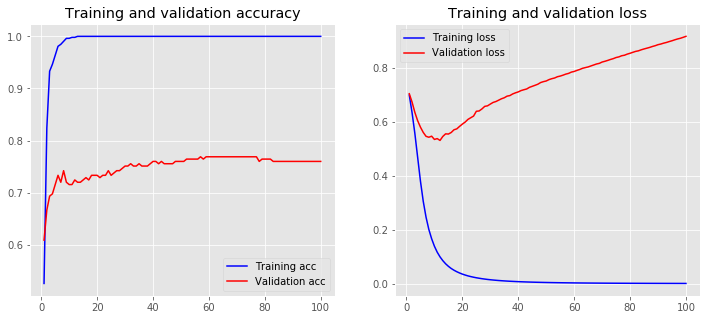

In [37]:
plot_history(history)

In [39]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)

In [42]:
sentences_train[:3]

array(['It rocked my world and is certainly a must see for anyone with no social or physical outlets.  ',
       "The most annoying thing about 'Cover Girl' is the way in which Rita Hayworth is put up on a pedestal.  ",
       'There still are good actors around!  '], dtype=object)

In [40]:
tokenizer.fit_on_texts(sentences_train)

In [48]:
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)
X_train[:3]

[[7, 872, 54, 296, 3, 5, 178, 2, 363, 55, 16, 128, 20, 60, 873, 43, 874, 875],
 [1,
  64,
  297,
  156,
  36,
  515,
  516,
  5,
  1,
  108,
  10,
  93,
  876,
  877,
  5,
  298,
  99,
  21,
  2,
  878],
 [39, 109, 23, 31, 157, 204]]

In [52]:
vocab_size = len(tokenizer.word_index) + 1

In [54]:
print(sentences_train[2])
X_train[2]

There still are good actors around!  


[39, 109, 23, 31, 157, 204]

In [57]:
tokenizer.word_index['around']

204

In [58]:
from keras.preprocessing.sequence import pad_sequences

In [59]:
maxlen = 100

In [61]:
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [62]:
X_train[2]

array([ 39, 109,  23,  31, 157, 204,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0])

In [63]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

In [64]:
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))

In [65]:
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [66]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           120500    
_________________________________________________________________
flatten_1 (Flatten)          (None, 5000)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                50010     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 170,521
Trainable params: 170,521
Non-trainable params: 0
_________________________________________________________________


In [69]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    validation_data=(X_test, y_test),
                    batch_size=10)

Train on 523 samples, validate on 225 samples
Epoch 1/20
523/523 [==============================] - 0s 730us/step - loss: 0.6971 - acc: 0.4952 - val_loss: 0.6881 - val_acc: 0.5467
Epoch 2/20
523/523 [==============================] - 0s 200us/step - loss: 0.6533 - acc: 0.7438 - val_loss: 0.6783 - val_acc: 0.5778
Epoch 3/20
523/523 [==============================] - 0s 215us/step - loss: 0.5203 - acc: 0.8872 - val_loss: 0.6483 - val_acc: 0.6178
Epoch 4/20
523/523 [==============================] - 0s 200us/step - loss: 0.2957 - acc: 0.9541 - val_loss: 0.6196 - val_acc: 0.6533
Epoch 5/20
523/523 [==============================] - 0s 192us/step - loss: 0.1366 - acc: 0.9904 - val_loss: 0.6171 - val_acc: 0.6578
Epoch 6/20
523/523 [==============================] - 0s 222us/step - loss: 0.0711 - acc: 0.9962 - val_loss: 0.6787 - val_acc: 0.6267
Epoch 7/20
523/523 [==============================] - 0s 192us/step - loss: 0.0373 - acc: 1.0000 - val_loss: 0.6555 - val_acc: 0.6489
Epoch 8/20
523/5

Training Accuracy: 1.0000
Testing Accuracy:  0.6400


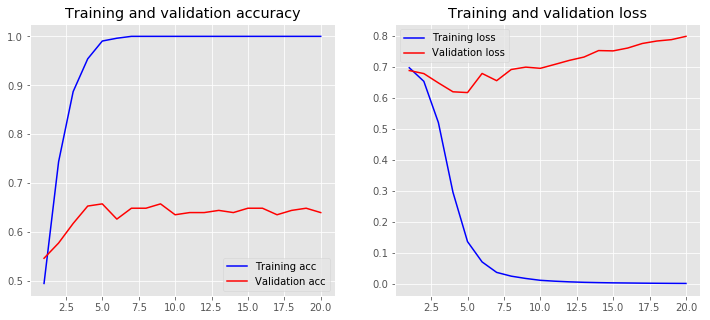

In [70]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [71]:
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 50)           120500    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 121,021
Trainable params: 121,021
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 1.0000
Testing Accuracy:  0.7467


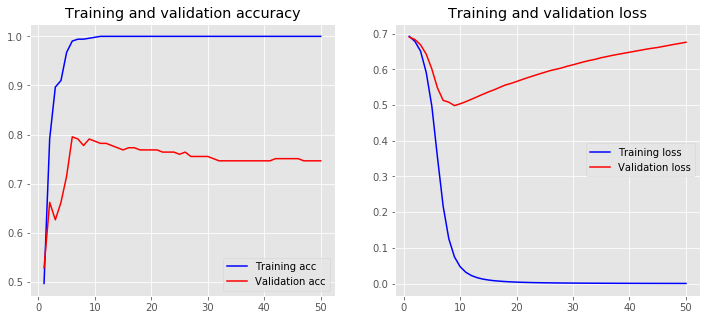

In [72]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [75]:
import numpy as np

def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath, encoding='utf-8') as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [76]:
embedding_dim = 50
embedding_matrix = create_embedding_matrix('glove.6B/glove.6B.50d.txt', tokenizer.word_index, embedding_dim)

In [79]:
np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1)) / vocab_size

0.9489626556016597

In [80]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=False))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 50)           120500    
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 50)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 121,021
Trainable params: 521
Non-trainable params: 120,500
_________________________________________________________________


Training Accuracy: 0.7591
Testing Accuracy:  0.7244


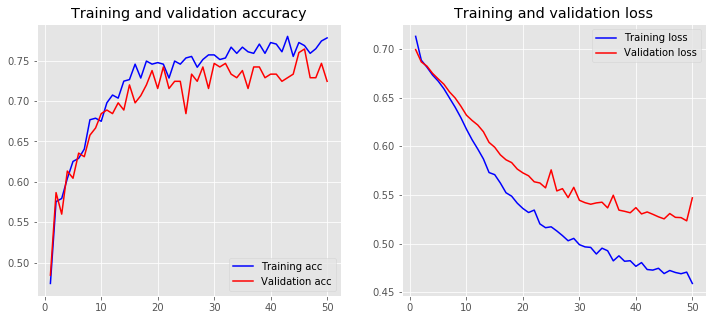

In [81]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [82]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=True))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 50)           120500    
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 50)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 11        
Total params: 121,021
Trainable params: 121,021
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 1.0000
Testing Accuracy:  0.7422


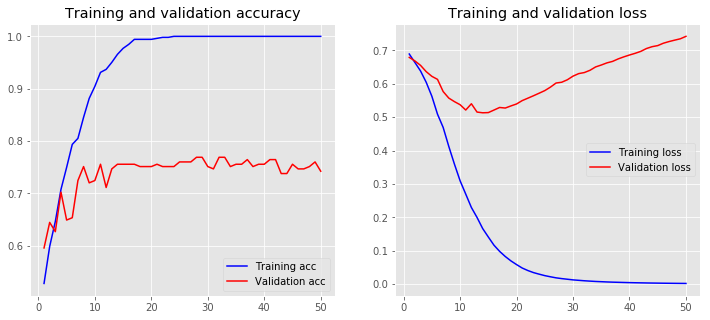

In [83]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [84]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 100)          241000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 306,429
Trainable params: 306,429
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 1.0000
Testing Accuracy:  0.7378


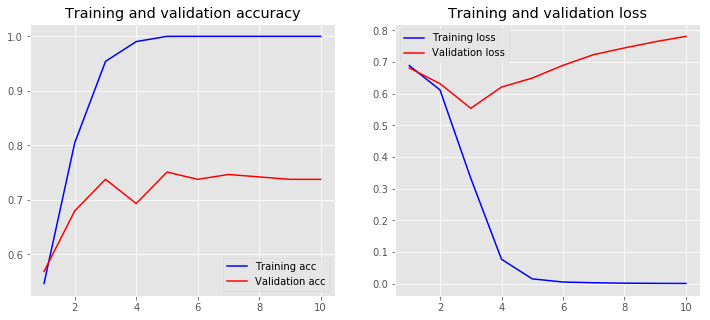

In [85]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [90]:
df.source.unique()

array(['imdb'], dtype=object)